In [20]:
import numpy
import pandas as pd
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
label_encoder = preprocessing.LabelEncoder() 
df = pd.read_csv('Data.csv')
pd.set_option('display.max_columns', None)
# Split max_torque and max_power into separate columns
df[['torque_value', 'torque_rpm']] = df['max_torque'].str.split('@', expand=True)
df[['power_value', 'power_rpm']] = df['max_power'].str.split('@', expand=True)

# Remove units and convert to numeric
df['torque_value'] = df['torque_value'].str.replace('Nm', '').astype(float)
df['torque_rpm'] = df['torque_rpm'].str.replace('rpm', '').astype(int)
df['power_value'] = df['power_value'].str.replace('bhp', '').astype(float)
df['power_rpm'] = df['power_rpm'].str.replace('rpm', '').astype(int)
df_proc = df
display(df.head(2))


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque_value,torque_rpm,power_value,power_rpm
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500,40.36,6000
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500,40.36,6000


In [21]:
#Creating new feature columns by combining one or more columns
df_proc["policy_age_at_claim"] = df_proc["policy_tenure"] * 12 #Policy Age at Claim Time
df_proc["car_age_at_claim"] = df_proc["age_of_car"] + df_proc["policy_tenure"] # Car Age at Claim Time

#Modifying the Boolean fields to 0 or 1
df_proc["is_speed_alert"].replace({'No': 0, 'Yes': 1}, inplace=True)
df_proc["is_tpms"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_esc"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_parking_sensors"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_parking_camera"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_brake_assist"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_adjustable_steering"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_ecw"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_day_night_rear_view_mirror"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_driver_seat_height_adjustable"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_power_steering"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_central_locking"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_power_door_locks"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_rear_window_defogger"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_rear_window_washer"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_rear_window_wiper"].replace({'No': 0, 'Yes': 1},inplace=True)
df_proc["is_front_fog_lights"].replace({'No': 0, 'Yes': 1},inplace=True)

df_proc["risk_factor"] = (df_proc["age_of_policyholder"] / df_proc["policy_tenure"]) * df_proc["is_speed_alert"].astype(int)
df_proc["vehicle_safety_index"] = df_proc["ncap_rating"] + df_proc["is_esc"] + df_proc["is_tpms"]
df_proc["advanced_sefety_features"] = df_proc["is_esc"] + df_proc["is_parking_sensors"] + df_proc["is_brake_assist"]
df_proc["safety_score"] = df_proc["is_esc"] + df_proc["is_parking_sensors"] + df_proc["is_brake_assist"] + df_proc["is_tpms"] + df_proc["is_parking_camera"]
df_proc["car_type"] = df_proc["segment"].astype(str) +"_"+ df_proc["make"].astype(str) +"_"+ df_proc["model"].astype(str)
df_proc["car_usage"] = df_proc["segment"].astype(str) + "_" + df_proc["fuel_type"].astype(str)
df_proc["performance_index"] = df_proc["torque_value"] + df_proc["torque_rpm"] + df_proc["power_value"] + df_proc["power_rpm"]
df_proc['policyholder_risk'] = df_proc['age_of_policyholder'] / df_proc['policy_tenure']

# Using Label encoding to convert categorical values to numerical values based on the field type
df_proc["model_en"] = label_encoder.fit_transform(df_proc["model"])
df_proc["segment_en"] = label_encoder.fit_transform(df_proc["segment"])
df_proc["make_en"] = label_encoder.fit_transform(df_proc["make"])
df_proc["fuel_type_en"] = label_encoder.fit_transform(df_proc["fuel_type"])
df_proc["car_type_encode"] = label_encoder.fit_transform(df_proc["car_type"])
df_proc["car_usage_encode"] = label_encoder.fit_transform(df_proc["car_usage"])
df_final = df_proc
display(df_final.head(2))

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque_value,torque_rpm,power_value,power_rpm,policy_age_at_claim,car_age_at_claim,risk_factor,vehicle_safety_index,advanced_sefety_features,safety_score,car_type,car_usage,performance_index,policyholder_risk,model_en,segment_en,make_en,fuel_type_en,car_type_encode,car_usage_encode
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,6.190483,0.565874,1.248815,0,1,1,A_1_M1,A_CNG,9600.36,1.248815,0,0,0,0,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,8.071422,0.692619,0.557523,0,1,1,A_1_M1,A_CNG,9600.36,0.557523,0,0,0,0,0,0


Total Policies: 58592
Number of Claims: 3748
Claim Percentage: 6.40%


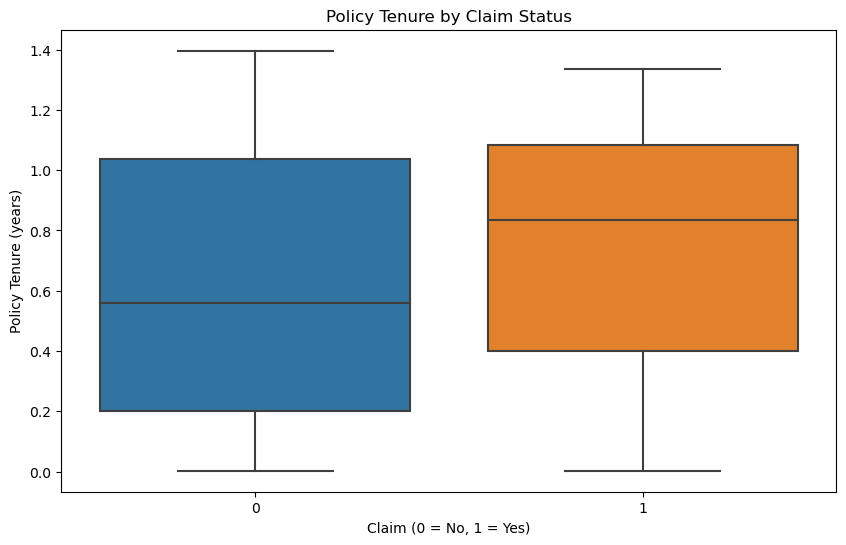

In [22]:
# Calculate the total number of policies
total_policies = len(df_proc)

# Calculate the number of claims
num_claims = df_proc['is_claim'].sum()

# Calculate the claim percentage
claim_percentage = (num_claims / total_policies) * 100

print(f'Total Policies: {total_policies}')
print(f'Number of Claims: {num_claims}')
print(f'Claim Percentage: {claim_percentage:.2f}%')

import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for Policy Tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_claim', y='policy_tenure', data=df_proc)
plt.title('Policy Tenure by Claim Status')
plt.xlabel('Claim (0 = No, 1 = Yes)')
plt.ylabel('Policy Tenure (years)')
plt.show()



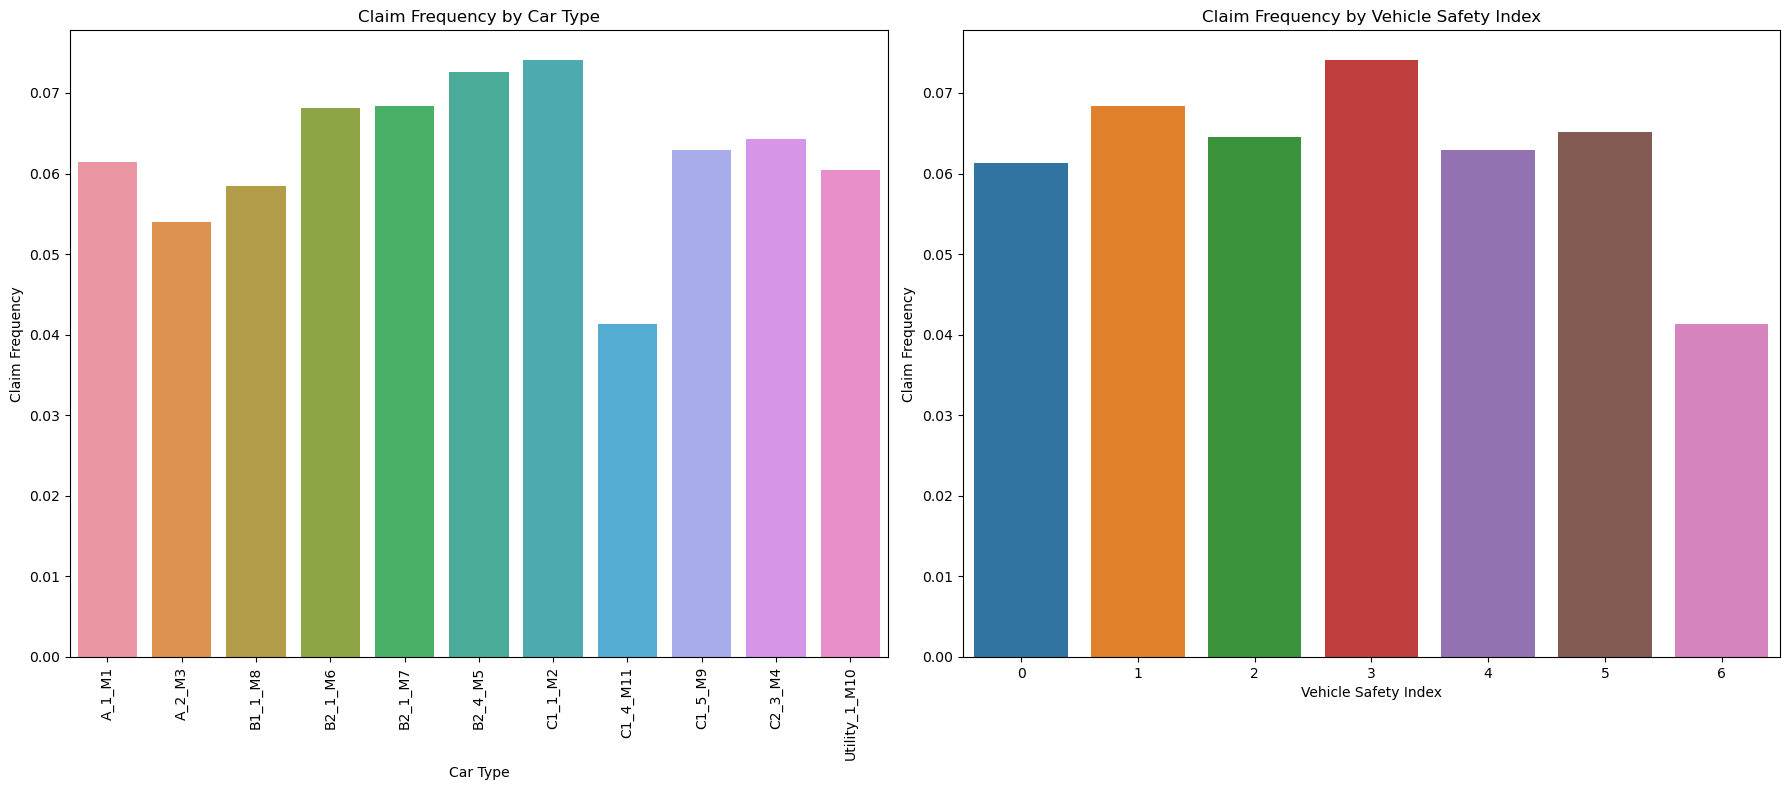

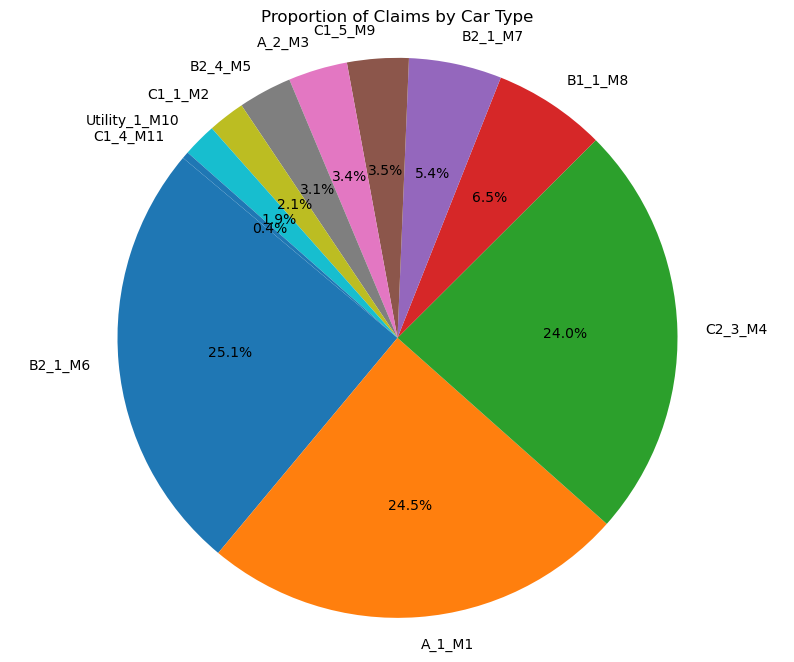

In [23]:
# Claim frequency by car type
car_type_claims = df_proc.groupby('car_type')['is_claim'].mean().reset_index()
car_type_claims.columns = ['car_type', 'claim_frequency']

# Claim frequency by vehicle safety index
safety_index_claims = df_proc.groupby('vehicle_safety_index')['is_claim'].mean().reset_index()
safety_index_claims.columns = ['vehicle_safety_index', 'claim_frequency']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot Claim Frequency by Car Type
sns.barplot(x='car_type', y='claim_frequency', data=car_type_claims, ax=axes[0])
axes[0].set_title('Claim Frequency by Car Type')
axes[0].set_xlabel('Car Type')
axes[0].set_ylabel('Claim Frequency')
axes[0].tick_params(axis='x', rotation=90)

# Plot Claim Frequency by Vehicle Safety Index
sns.barplot(x='vehicle_safety_index', y='claim_frequency', data=safety_index_claims, ax=axes[1])
axes[1].set_title('Claim Frequency by Vehicle Safety Index')
axes[1].set_xlabel('Vehicle Safety Index')
axes[1].set_ylabel('Claim Frequency')

plt.tight_layout()
plt.show()

# Proportion of claims by fuel type
fuel_type_claims = df_proc[df_proc['is_claim'] == 1]['fuel_type'].value_counts(normalize=True).reset_index()
fuel_type_claims.columns = ['fuel_type', 'proportion']

# Proportion of claims by car segment
car_segment_claims = df_proc[df_proc['is_claim'] == 1]['segment'].value_counts(normalize=True).reset_index()
car_segment_claims.columns = ['segment', 'proportion']


# Calculate the proportion of claims by car type
car_type_claims = df_proc[df_proc['is_claim'] == 1]['car_type'].value_counts(normalize=True).reset_index()
car_type_claims.columns = ['car_type', 'proportion']

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(car_type_claims['proportion'], labels=car_type_claims['car_type'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Claims by Car Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



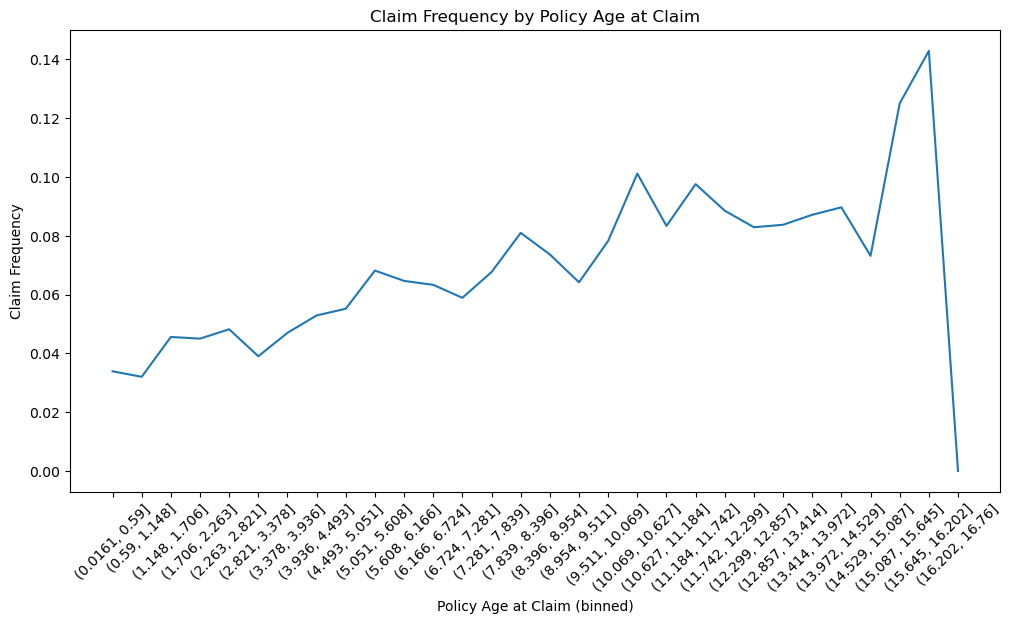

In [24]:



# Group by policy_age_at_claim and calculate claim frequency with better binning
policy_age_claims = df_proc.groupby(pd.cut(df_proc['policy_age_at_claim'], bins=30))['is_claim'].mean().reset_index()
policy_age_claims.columns = ['policy_age_at_claim', 'claim_frequency']

# Convert the binned intervals to strings for plotting
policy_age_claims['policy_age_at_claim'] = policy_age_claims['policy_age_at_claim'].astype(str)

# Plot Claim Frequency by Policy Age at Claim
plt.figure(figsize=(12, 6))
sns.lineplot(x='policy_age_at_claim', y='claim_frequency', data=policy_age_claims)
plt.title('Claim Frequency by Policy Age at Claim')
plt.xlabel('Policy Age at Claim (binned)')
plt.ylabel('Claim Frequency')
plt.xticks(rotation=45)
plt.show()



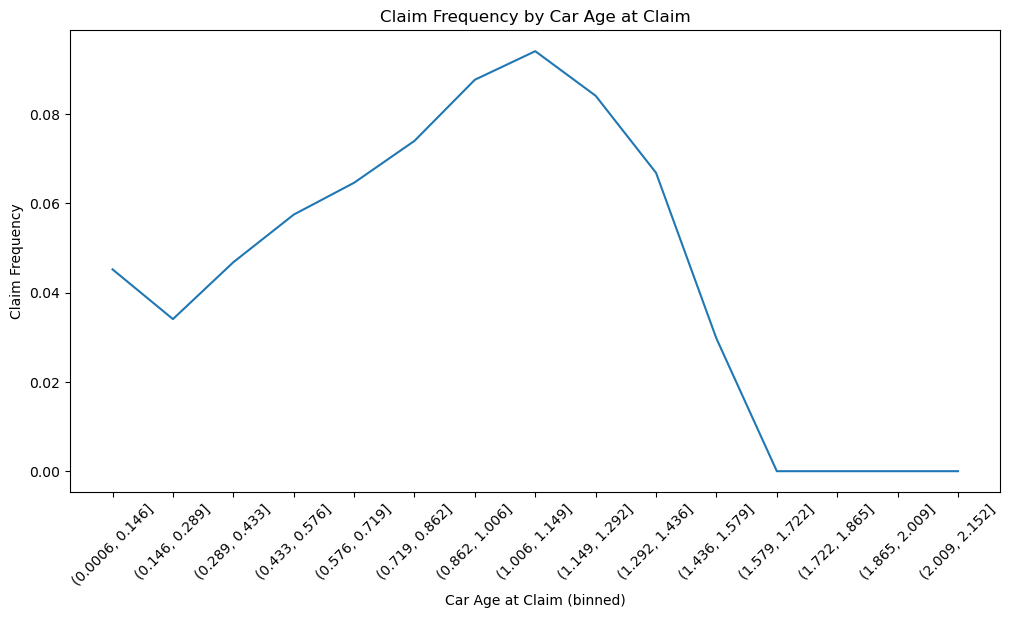

In [25]:
# Group by car_age_at_claim and calculate claim frequency with better binning
car_age_claims = df_proc.groupby(pd.cut(df_proc['car_age_at_claim'], bins=15))['is_claim'].mean().reset_index()
car_age_claims.columns = ['car_age_at_claim', 'claim_frequency']

# Convert the binned intervals to strings for plotting
car_age_claims['car_age_at_claim'] = car_age_claims['car_age_at_claim'].astype(str)

# Plot Claim Frequency by Car Age at Claim
plt.figure(figsize=(12, 6))
sns.lineplot(x='car_age_at_claim', y='claim_frequency', data=car_age_claims)
plt.title('Claim Frequency by Car Age at Claim')
plt.xlabel('Car Age at Claim (binned)')
plt.ylabel('Claim Frequency')
plt.xticks(rotation=45)
plt.show()